<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula03a_regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
type(data)

sklearn.utils._bunch.Bunch

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
print(data['feature_names'][:4])
print(data['data'][:10,:4])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
[[ 8.3252     41.          6.98412698  1.02380952]
 [ 8.3014     21.          6.23813708  0.97188049]
 [ 7.2574     52.          8.28813559  1.07344633]
 [ 5.6431     52.          5.8173516   1.07305936]
 [ 3.8462     52.          6.28185328  1.08108108]
 [ 4.0368     52.          4.76165803  1.10362694]
 [ 3.6591     52.          4.93190661  0.95136187]
 [ 3.12       52.          4.79752705  1.0618238 ]
 [ 2.0804     42.          4.29411765  1.11764706]
 [ 3.6912     52.          4.97058824  0.99019608]]


In [13]:
print(data['target'][:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


In [14]:
X, y = data['data'], data['target']
print(X.shape, y.shape)

(20640, 8) (20640,)


In [16]:
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X, y, random_state=42)
print(Xtr.shape, Xte.shape, ytr.shape, yte.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


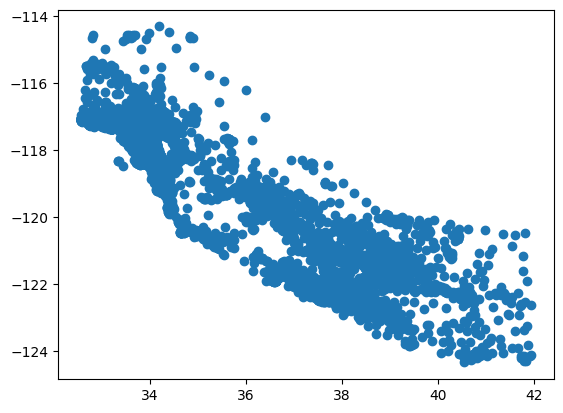

In [22]:
import matplotlib.pyplot as plt
plt.scatter(Xtr[:,6], Xtr[:,7])
plt.show()

atribute 0


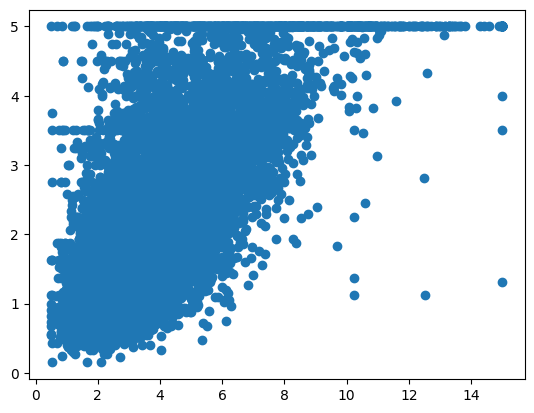

In [24]:
for i in [0]: #range(Xtr.shape[1]):
    print(f'atribute {i}')
    plt.scatter(Xtr[:,i], ytr)
    plt.show()

In [25]:
Xtr[:, 2].shape

(15480,)

In [27]:
Xtr2 = Xtr[:, 2:3]
Xtr2.shape

(15480, 1)

In [31]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
v = np.array([10,20,30])
print("A:\n", A)
print("v:\n", v)

A:
 [[1 2 3]
 [4 5 6]]
v:
 [10 20 30]


In [32]:
print(A * v)
print(A @ v)

[[ 10  40  90]
 [ 40 100 180]]
[140 320]


In [33]:
def modelo_linear(X, w, b):
    return X @ w + b

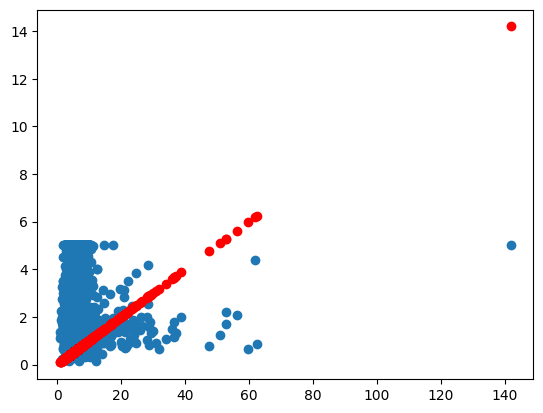

In [38]:
ypred = modelo_linear(Xtr2, [0.1], 0)
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

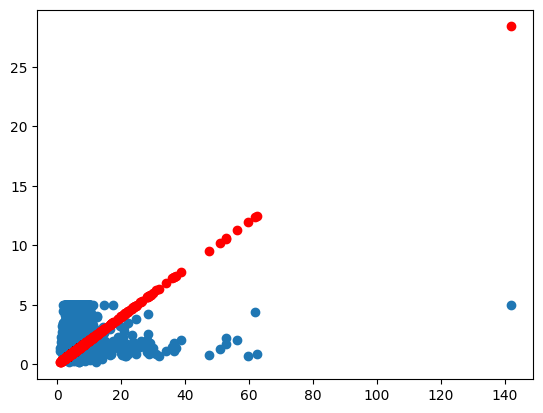

In [40]:
ypred = modelo_linear(Xtr2, [0.2], 0)
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

In [41]:
# mean absolute error
def mae(y, ypred):
    return np.mean(np.abs(y - ypred))

print(mae(ytr, modelo_linear(Xtr2, [0.1], 0)))
print(mae(ytr, modelo_linear(Xtr2, [0.2], 0)))

1.5428050816517667
1.1306658434784336


In [42]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(ytr, modelo_linear(Xtr2, [0.1], 0)))
print(mean_absolute_error(ytr, modelo_linear(Xtr2, [0.2], 0)))

1.5428050816517667
1.1306658434784336


In [43]:
# mean squared error
def mse(y, ypred):
    return np.mean((y - ypred)**2)

print(mse(ytr, modelo_linear(Xtr2, [0.1], 0)))
print(mse(ytr, modelo_linear(Xtr2, [0.2], 0)))

3.636304968191444
2.3601452474998914


In [44]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(ytr, modelo_linear(Xtr2, [0.1], 0)))
print(mean_squared_error(ytr, modelo_linear(Xtr2, [0.2], 0)))

3.636304968191444
2.3601452474998914


In [45]:
# root mean squared error
def rmse(y, ypred):
    return np.sqrt(np.mean((y - ypred)**2))

print(rmse(ytr, modelo_linear(Xtr2, [0.1], 0)))
print(rmse(ytr, modelo_linear(Xtr2, [0.2], 0)))

1.9069097955046128
1.5362764228809513


In [46]:
from sklearn.metrics import root_mean_squared_error

print(root_mean_squared_error(ytr, modelo_linear(Xtr2, [0.1], 0)))
print(root_mean_squared_error(ytr, modelo_linear(Xtr2, [0.2], 0)))
#

1.9069097955046128
1.5362764228809513


[0.85884838]
3.4140672689220546


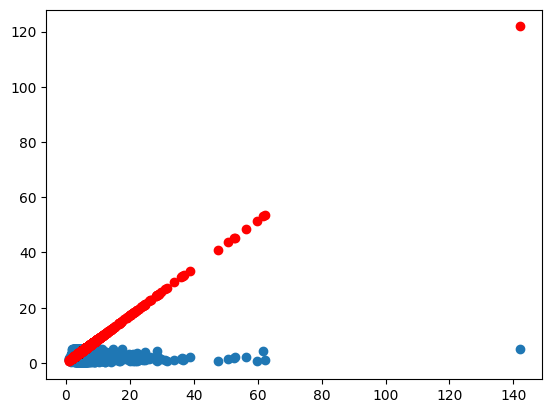

In [52]:
class LinearRegression:
    def __init__(self):
        pass

    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1])
        print(self.w)
        return self

    def predict(self, X):
        return X @ self.w

model = LinearRegression()
model.fit(Xtr2, ytr)
ypred = model.predict(Xtr2)
print(root_mean_squared_error(ytr, ypred))
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()

[0.33019904]
1.326607510746015


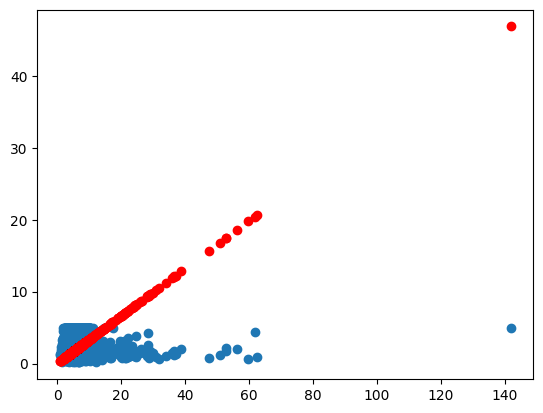

In [72]:
from operator import is_
class LinearRegression:
    def __init__(self):
        self.learning_rate = 0.000001

    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1])
        for _ in range(20):
            ypred = X @ self.w
            error = y - ypred
            self.w += self.learning_rate * X.T @ error
            # if np.any(np.isnan(self.w)):
            #     break
        print(self.w)
        return self

    def predict(self, X):
        return X @ self.w

model = LinearRegression()
model.fit(Xtr2, ytr)
ypred = model.predict(Xtr2)
print(root_mean_squared_error(ytr, ypred))
plt.scatter(Xtr2, ytr)
plt.scatter(Xtr2, ypred, c='r')
plt.show()